# *Importation des bibloiotheque*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # EDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

import seaborn as sns


# **Importation fichier csv dans colab**

In [ ]:
from google.colab import files
uploaded = files.upload()




Saving Heart_disease_cleveland_new.csv to Heart_disease_cleveland_new.csv


**Data Frame**

In [ ]:
data = pd.read_csv("Heart_disease_cleveland_new.csv")


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


[texte du lien](https://)# **Comprehension du dataset**

In [ ]:
data.shape

(303, 14)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Prepartion du data

In [ ]:
som_val_manque = data.isna().sum()
print(som_val_manque)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


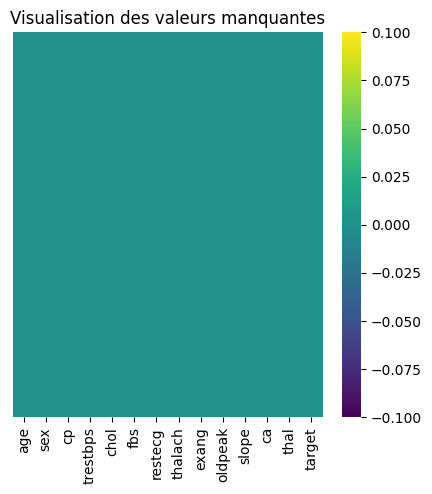

In [ ]:
# Vérifier les valeurs manquantes
valeur_manqs = data.isnull()

# Créer une heatmap pour visualiser les valeurs manquantes
plt.figure(figsize=(5, 5))
sns.heatmap(valeur_manqs, cbar=True, cmap='viridis', yticklabels=False)

# Ajouter un titre au graphique
plt.title('Visualisation des valeurs manquantes')
plt.savefig('valeurs_manquentes.png')
plt.show()
plt.close()

In [ ]:
# les duplicats
len(data.loc[data.duplicated()])

0

*visualisation de la variable cible (target)

```
# Ce texte est au format code
```



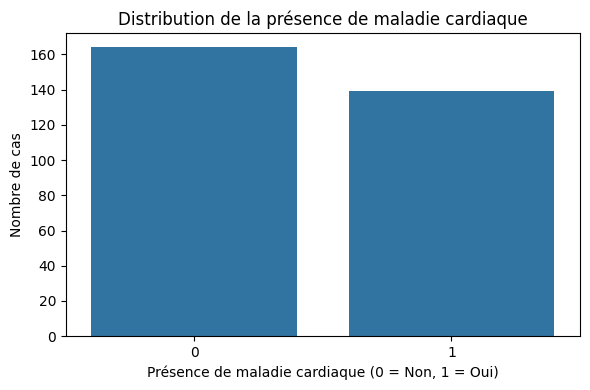

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Distribution de la présence de maladie cardiaque')
plt.xlabel('Présence de maladie cardiaque (0 = Non, 1 = Oui)')
plt.ylabel('Nombre de cas')
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()
plt.close()

# Description variables numerique

In [ ]:
# les variables numeriques
numerique_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print(data[numerique_vars].describe())


              age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604
std      9.038662   17.599748   51.776918   22.875003    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000
75%     61.000000  140.000000  275.000000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000


# Visualisation graphique

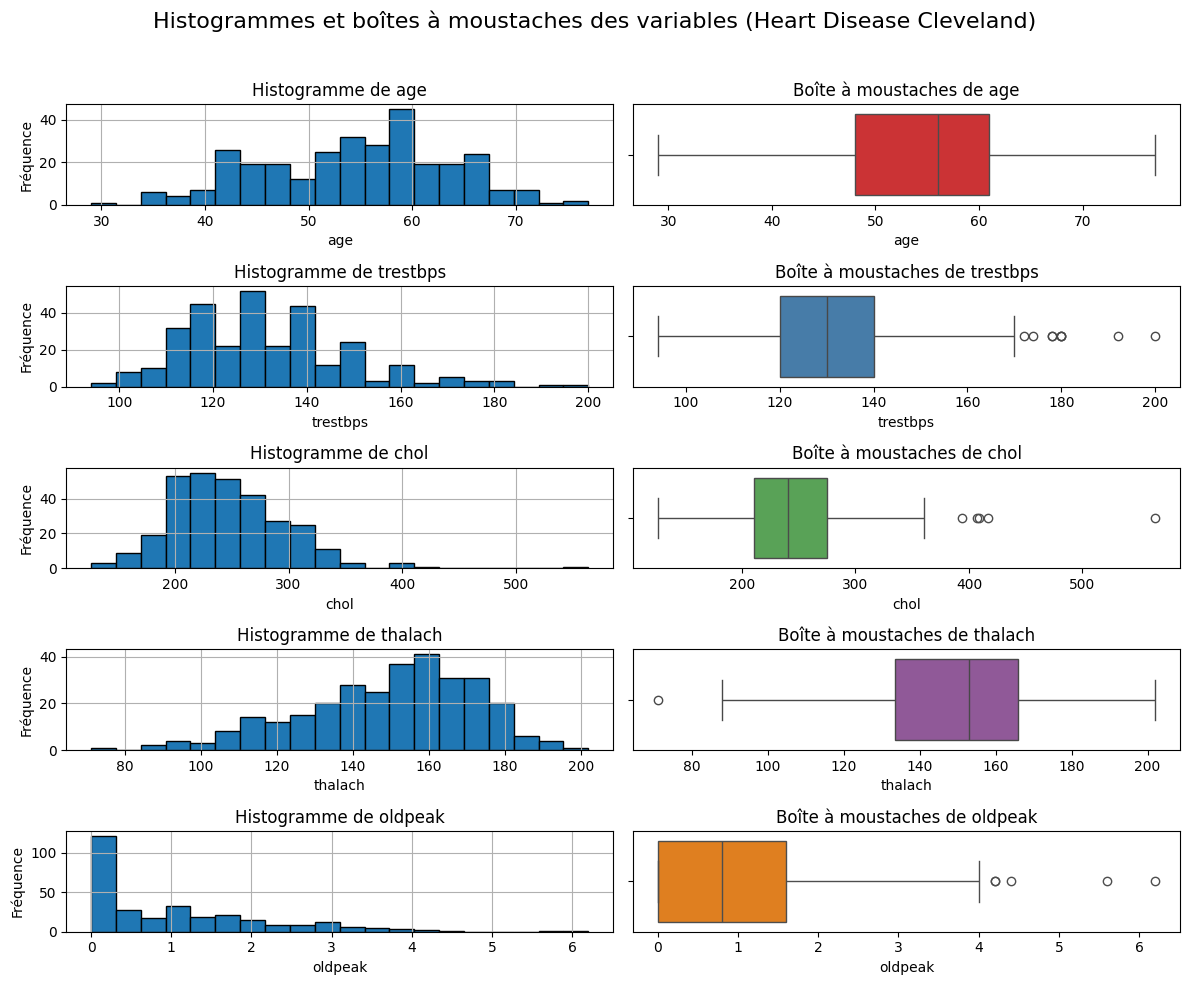

In [ ]:

for col in numerique_vars:
    data[col] = data[col].astype(float)

# Générer des couleurs pour les boxplots
colors = sns.color_palette('Set1', n_colors=len(numerique_vars))

# Créer une figure avec histogrammes et boxplots
fig = plt.figure(figsize=(12, 10))

# Histogrammes
for i, col in enumerate(numerique_vars, 1):
    ax = plt.subplot(len(numerique_vars), 2, 2*i-1)
    data[col].hist(bins=20, edgecolor='black', ax=ax)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

# Boxplots
for i, (col, color) in enumerate(zip(numerique_vars, colors), 1):
    ax = plt.subplot(len(numerique_vars), 2, 2*i)
    sns.boxplot(x=data[col].dropna(), color=color, ax=ax, orient='h')
    plt.title(f'Boîte à moustaches de {col}')
    plt.xlabel(col)

plt.suptitle('Histogrammes et boîtes à moustaches des variables (Heart Disease Cleveland)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuster pour le titre
plt.show()

Correlation entre variable numerique

In [ ]:
corr_matrix = data[numerique_vars].corr() # calcul de la matrice de correlation

print("Matrice  corrélation des variables numériques :") # Affichage de la matrice
print(corr_matrix)


Matrice  corrélation des variables numériques :
               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.284946  0.208950 -0.393806  0.203805
trestbps  0.284946  1.000000  0.130120 -0.045351  0.189171
chol      0.208950  0.130120  1.000000 -0.003432  0.046564
thalach  -0.393806 -0.045351 -0.003432  1.000000 -0.343085
oldpeak   0.203805  0.189171  0.046564 -0.343085  1.000000


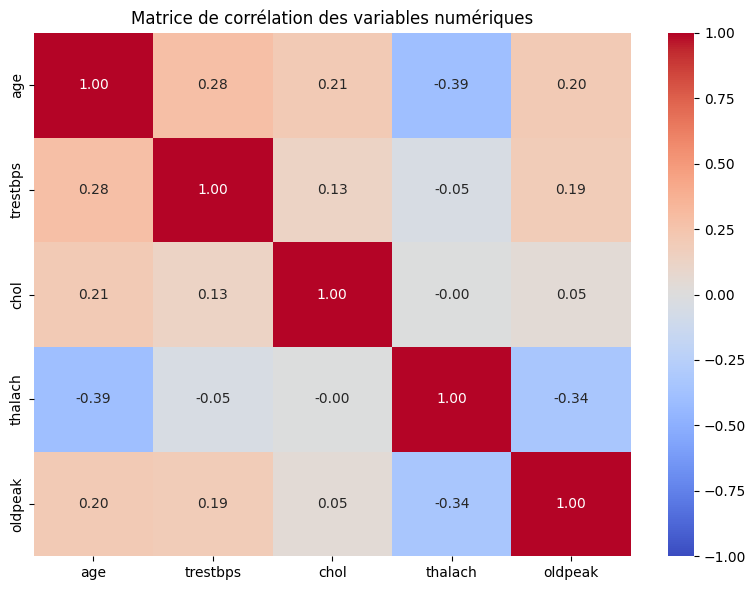

In [ ]:
# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')

plt.tight_layout()
plt.show()

EDA variable Categorielles

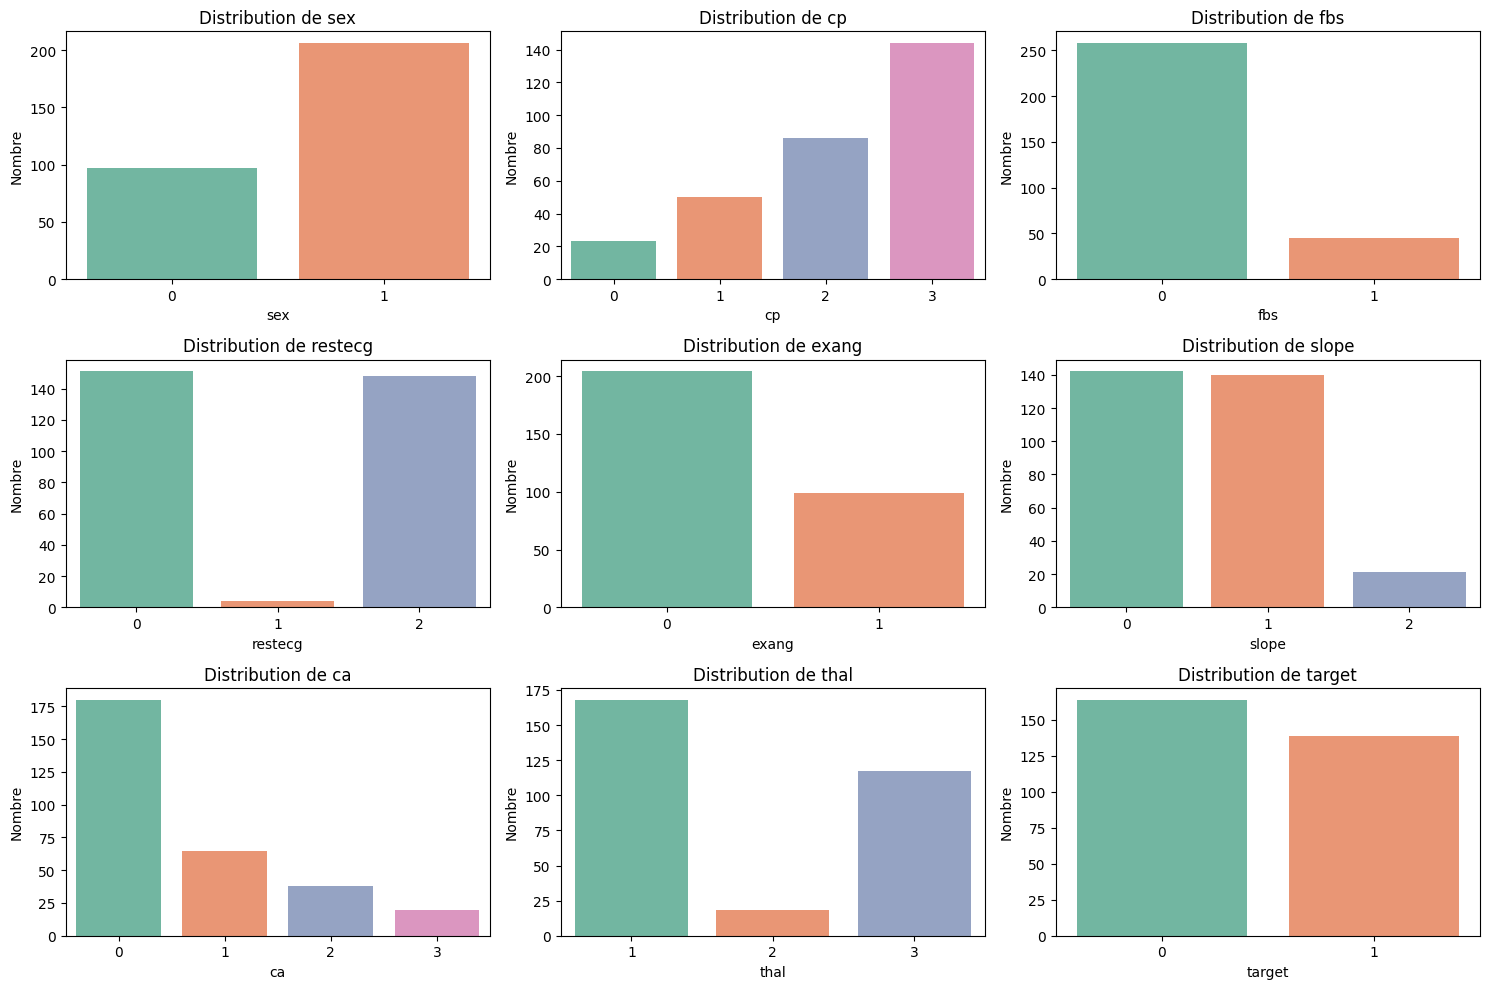

In [ ]:
# Liste des variables catégorielles
categorique_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
# ou bien
# categorique_varss = data.columns.difference(numerique_vars)
# print(categorique_varss)
for col in categorique_vars:
    data[col] = data[col].astype('category')

# Visualisation : Diagrammes en barres pour chaque variable categorielle
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorique_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=data, hue=col, palette='Set2', legend=False)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre')
plt.tight_layout()
plt.show()


In [ ]:
#  relations entre la variable cible (target) et les variables categories
print("\nAnalyse des relations avec la variable cible (target) :")
for col in categorique_vars[:-1]:  # Exclure 'target' lui-même
    print(f"\nTableau de contingence pour {col} vs target :")
    contingency_table = pd.crosstab(data[col], data['target'], normalize='index') * 100
    print(contingency_table)


Analyse des relations avec la variable cible (target) :

Tableau de contingence pour sex vs target :
target          0          1
sex                         
0       74.226804  25.773196
1       44.660194  55.339806

Tableau de contingence pour cp vs target :
target          0          1
cp                          
0       69.565217  30.434783
1       82.000000  18.000000
2       79.069767  20.930233
3       27.083333  72.916667

Tableau de contingence pour fbs vs target :
target          0          1
fbs                         
0       54.651163  45.348837
1       51.111111  48.888889

Tableau de contingence pour restecg vs target :
target           0          1
restecg                      
0        62.913907  37.086093
1        25.000000  75.000000
2        45.945946  54.054054

Tableau de contingence pour exang vs target :
target          0          1
exang                       
0       69.117647  30.882353
1       23.232323  76.767677

Tableau de contingence pour slope vs tar

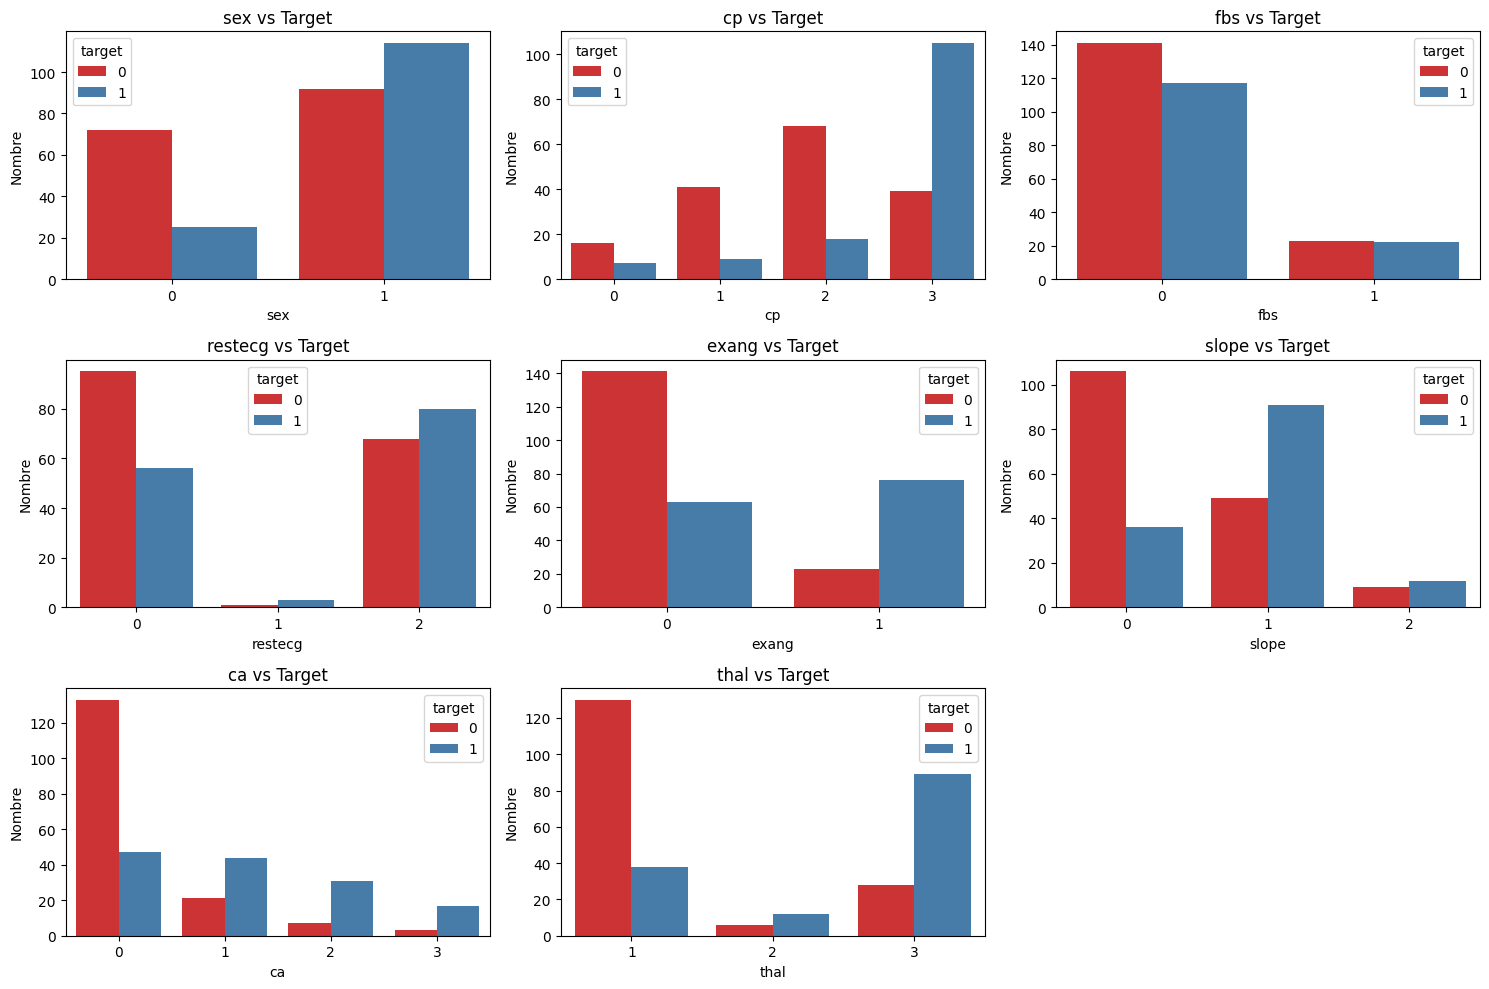

In [ ]:
# Visualisation : Diagrammes en barres  pour chaque variable catégorielle vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorique_vars[:-1], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='target', data=data, palette='Set1')
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Nombre')
plt.tight_layout()
plt.show()

# Netewoyage des donnes

In [ ]:
def remove_outliers_iqr(df, column):  #  pour supprimer les outliers par la méthode IQR

    # Calcul des quantiles Q1 et Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)


    IQR = Q3 - Q1  # calcul de l'IQR

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  # les bornes par defintion

    # Détection et suppression des outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered, len(outliers)

# Copier les données pour ne pas modifier l'original
new_data = data.copy()

# Sélectionner uniquement les colonnes numériques
columns_to_check = new_data.select_dtypes(include=[np.number]).columns.tolist()

# Initialiser un compteur global
total_removed_outliers = 0

# Suppression des outliers pour chaque colonne numérique
for column in columns_to_check:
    # Vérifier que la colonne n'est pas vide ou entièrement NaN
    if new_data[column].dropna().empty:
        print(f"Colonne '{column}' vide ou seulement des NaN. Ignorée.")
        continue

    new_data, removed_count = remove_outliers_iqr(new_data, column)
    total_removed_outliers += removed_count
    print(f"Outliers supprimés pour '{column}' : {removed_count}")

# Résumé
print(f"\nNombre total d'outliers supprimés : {total_removed_outliers}")
print(f"Nombre de lignes avant suppression : {len(data)}")
print(f"Nombre de lignes après suppression : {len(new_data)}")


Outliers supprimés pour 'age' : 0
Outliers supprimés pour 'trestbps' : 9
Outliers supprimés pour 'chol' : 5
Outliers supprimés pour 'thalach' : 1
Outliers supprimés pour 'oldpeak' : 4

Nombre total d'outliers supprimés : 19
Nombre de lignes avant suppression : 303
Nombre de lignes après suppression : 284


In [ ]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(y_test.unique())
Counter(y_train)

[0, 1]
Categories (2, int64): [0, 1]


Counter({0: 135, 1: 107})

## **ML models**


1. Regression logistique

2. Arbre de decision



# Model evaluation

Regression logistique

In [ ]:
m1 = 'Logistic Regression'
model = LogisticRegression() #CREATION DU MODEL

model.fit(X_train, y_train) # entrainement

y_pred = model.predict(X_test) # calcul de prediction

conf_matrix = confusion_matrix(y_test, y_pred) # matrice de confusion

#accuracy

acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",acc_score*100,'\n')
print(classification_report(y_test, y_pred))

confussion matrix
[[25  4]
 [ 3 29]]


Accuracy of Logistic Regression: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Arbre de *decision*

In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6) # creation de l'arbre de decision
dt.fit(X_train, y_train) # entrainement
dt_predicted = dt.predict(X_test) #prediction
dt_conf_matrix = confusion_matrix(y_test, dt_predicted) # matrice de confusion
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[23  6]
 [ 9 23]]


Accuracy of DecisionTreeClassifier: 75.40983606557377 

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.79      0.72      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



La courbe ROC et L'AUC




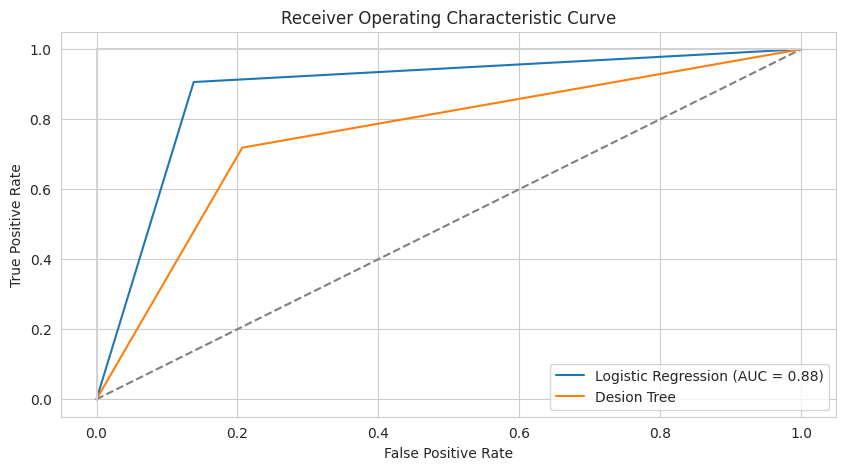

In [ ]:

# Supposons que y_test et y_pred sont déjà définis
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(y_test, y_pred)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)

roc_auc = auc(lr_false_positive_rate, lr_true_positive_rate)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.title('Receiver Operating Characteristic Curve')

plt.plot(lr_false_positive_rate, lr_true_positive_rate,
         label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot([0, 0], [1, 0], color='lightgrey')
plt.plot([1, 1], color='lightgrey')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('ROC_Characteristic_Curve.png')
plt.show()


Comparaison

In [ ]:
model_ev = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [acc_score, dt_acc_score]
})
model_ev

,Model,Accuracy
0,Logistic Regression,0.885246
1,Decision Tree,0.754098
